In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
print(f'The number of columns: = {df.shape[1]}\n The number of rows: = {df.shape[0]}')

The number of columns: = 2
 The number of rows: = 50000


In [ ]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

C:\Users\swayam\AppData\Local\Temp\ipykernel_10600\320036273.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis')


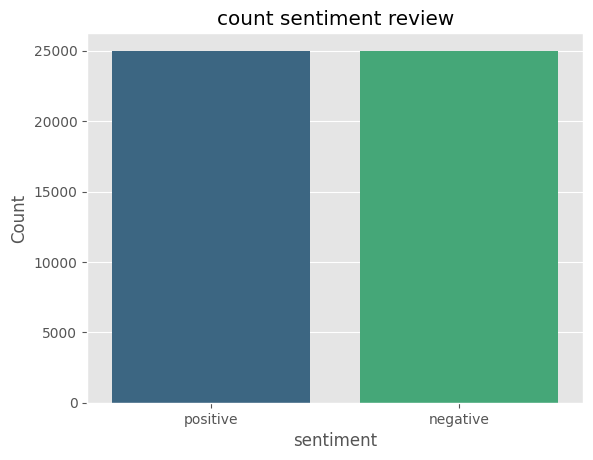

In [ ]:
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('count sentiment review')
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

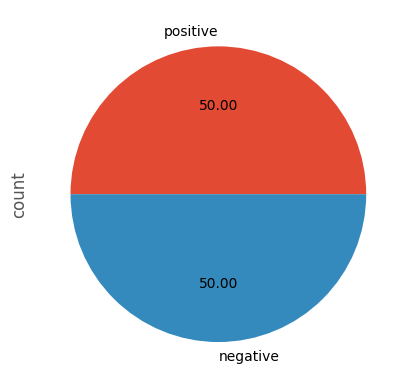

In [ ]:
df['sentiment'].value_counts().plot.pie(autopct='%.2f')

In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.duplicated().sum()


np.int64(418)

In [ ]:
df = df.drop_duplicates()


In [ ]:
print(f'The number of columns: = {df.shape[1]}\n The number of rows: = {df.shape[0]}')

The number of columns: = 2
 The number of rows: = 49582


In [ ]:
#lower case
df['review'] = df['review'].str.lower()

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
#remove html tag
def remove_html_tag(text):
    pattern = re.compile(r'<[^>]+>')
    return pattern.sub(r'', text)

In [ ]:
df['review'] = df['review'].apply(remove_html_tag)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [ ]:
#removing punctuation
import string
def remove_pun(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
df['review'] = df['review'].apply(remove_pun)

In [ ]:
df.head()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
import nltk
print(nltk.data.path)

['C:\\Users\\swayam/nltk_data', 'c:\\Users\\swayam\\AppData\\Local\\Programs\\Python\\Python312\\nltk_data', 'c:\\Users\\swayam\\AppData\\Local\\Programs\\Python\\Python312\\share\\nltk_data', 'c:\\Users\\swayam\\AppData\\Local\\Programs\\Python\\Python312\\lib\\nltk_data', 'C:\\Users\\swayam\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [ ]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [ ]:
df['review'] = df['review'].apply(stemming)


In [ ]:
#df['review'] = df['review'].apply(data_processing)


In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment


In [ ]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

C:\Users\swayam\AppData\Local\Temp\ipykernel_10600\159144519.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentiment.replace("positive", 1, inplace=True)
C:\Users\swayam\AppData\Local\Temp\ipykernel_10600\159144519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [ ]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production the filming tech...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [ ]:
df.tail()

,review,sentiment
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i am a catholic taught in parochial elementary...,0
49998,im going to have to disagree with the previous...,0
49999,no one expects the star trek movies to be high...,0


In [ ]:
X = df['review']
Y = df['sentiment']

In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [ ]:
X.shape

(49582, 221438)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34707, 221438)
Size of y_train:  (34707,)
Size of x_test:  (14875, 221438)
Size of y_test:  (14875,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

In [ ]:
print("Naive Bayes...")
mnb = MultinomialNB()
start_time = time.time()
mnb.fit(x_train, y_train)
train_time = time.time() - start_time

y_pred = mnb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Multinomial NB Test Accuracy: {accuracy:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

36 Naive Bayes...
Multinomial NB Test Accuracy: 0.8606
Training time: 0.08 seconds

Confusion Matrix:
[[6527  877]
 [1196 6275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      7404
           1       0.88      0.84      0.86      7471

    accuracy                           0.86     14875
   macro avg       0.86      0.86      0.86     14875
weighted avg       0.86      0.86      0.86     14875



In [ ]:
print("Training Logistic Regression...")
lr = LogisticRegression(max_iter=1000)
start_time = time.time()
lr.fit(x_train, y_train)
train_time = time.time() - start_time

y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression Test Accuracy: {accuracy:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Logistic Regression...
Logistic Regression Test Accuracy: 0.8925
Training time: 3.34 seconds

Confusion Matrix:
[[6541  863]
 [ 736 6735]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7404
           1       0.89      0.90      0.89      7471

    accuracy                           0.89     14875
   macro avg       0.89      0.89      0.89     14875
weighted avg       0.89      0.89      0.89     14875



In [ ]:
print("Training SVM...")
svm = LinearSVC(random_state=42, max_iter=1000)
start_time = time.time()
svm.fit(x_train, y_train)
train_time = time.time() - start_time

y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"SVM Test Accuracy: {accuracy:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training SVM...
SVM Test Accuracy: 0.8988
Training time: 1.08 seconds

Confusion Matrix:
[[6595  809]
 [ 697 6774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7404
           1       0.89      0.91      0.90      7471

    accuracy                           0.90     14875
   macro avg       0.90      0.90      0.90     14875
weighted avg       0.90      0.90      0.90     14875



In [ ]:
print("Training Decision Tree...")
dt = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt.fit(x_train, y_train)
train_time = time.time() - start_time

y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Tree Test Accuracy: {accuracy:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training Decision Tree...
Decision Tree Test Accuracy: 0.7036
Training time: 184.07 seconds

Confusion Matrix:
[[5170 2234]
 [2175 5296]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      7404
           1       0.70      0.71      0.71      7471

    accuracy                           0.70     14875
   macro avg       0.70      0.70      0.70     14875
weighted avg       0.70      0.70      0.70     14875



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

print("Training K-Nearest Neighbors...")
knn = KNeighborsClassifier(n_neighbors=5)  
start_time = time.time()
knn.fit(x_train, y_train)
train_time = time.time() - start_time

y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"KNN Test Accuracy: {accuracy:.4f}")
print(f"Training time: {train_time:.2f} seconds")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training K-Nearest Neighbors...
KNN Test Accuracy: 0.7488
Training time: 0.03 seconds

Confusion Matrix:
[[5168 2236]
 [1500 5971]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.73      7404
           1       0.73      0.80      0.76      7471

    accuracy                           0.75     14875
   macro avg       0.75      0.75      0.75     14875
weighted avg       0.75      0.75      0.75     14875



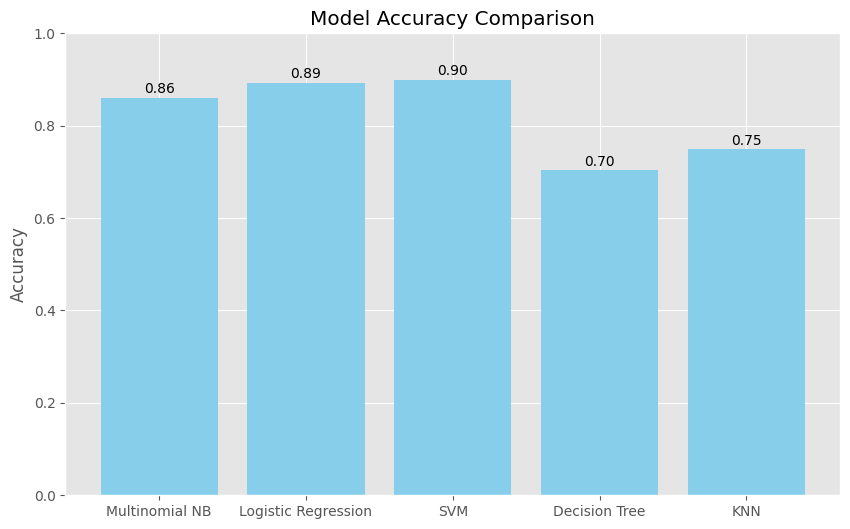

In [ ]:
#comparision on accuracy scores

import matplotlib.pyplot as plt


model_names = ['Multinomial NB', 'Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracies = [ 
    accuracy_score(y_test, mnb.predict(x_test)),
    accuracy_score(y_test, lr.predict(x_test)),
    accuracy_score(y_test, svm.predict(x_test)),
    accuracy_score(y_test, dt.predict(x_test)),
    accuracy_score(y_test, knn.predict(x_test))
]

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center')
plt.show()


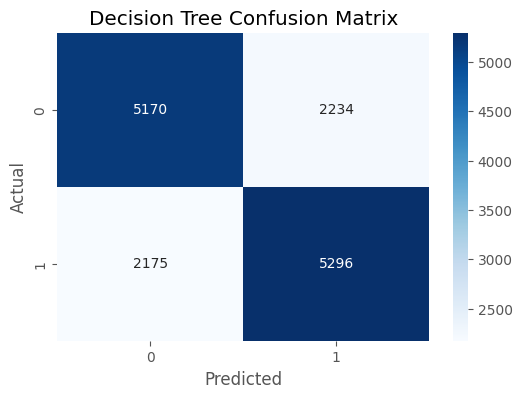

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dt.predict(x_test))
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
train_comments = x_train.shape[0]
test_comments = x_test.shape[0]

In [ ]:
print(train_comments,test_comments)

34707 14875


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split


X = df["review"]
y = df["sentiment"].replace({"positive": 1, "negative": 0})
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def count_sentences(texts):
    sentence_end_pattern = re.compile(r'[.!?](?:\s|$)')
    total = 0
    for review in texts:
        review_str = str(review).strip()
        matches = sentence_end_pattern.findall(review_str)
        total += max(1, len(matches))  
    return total

train_sentences = count_sentences(x_train)
test_sentences = count_sentences(x_test)

aspect_terms = [
    "plot", "story", "acting", "direction", "performance", "script",
    "dialogue", "cinematography", "music", "sound", "character", "ending"
]

def count_aspects(texts, aspects):
    aspect_reviews = 0
    aspect_term_count = 0
    for review in texts:
        review = str(review).lower()
        matched = [term for term in aspects if term in review]
        if matched:
            aspect_reviews += 1
            aspect_term_count += len(matched)
    return aspect_reviews, aspect_term_count

train_aspect_reviews, train_aspect_terms = count_aspects(x_train, aspect_terms)
test_aspect_reviews, test_aspect_terms = count_aspects(x_test, aspect_terms)

summary = {
    "Examples": ["Training", "Testing"],
    "Dataset Used": ["IMDb Reviews", "IMDb Reviews"],
    "Sample Comments": [x_train.shape[0], x_test.shape[0]],
    "Sentences": [train_sentences, test_sentences],
    "Number of Aspect-Based Reviews": [train_aspect_reviews, test_aspect_reviews],
    "Number of Aspect Terms in Reviews": [train_aspect_terms, test_aspect_terms],
}

summary_df = pd.DataFrame(summary)
print(summary_df)


   Examples  Dataset Used  Sample Comments  Sentences  \
0  Training  IMDb Reviews            34707      34707   
1   Testing  IMDb Reviews            14875      14875   

   Number of Aspect-Based Reviews  Number of Aspect Terms in Reviews  
0                           27595                              64081  
1                           11906                              27723  
